# My Super Cool Notebook 😎
---

## 1. Import all the dependencies
---

In [1]:
#@markdown ## Load key dependencies
import numpy as np
from matplotlib import pyplot as plt
import imageio.v2 as imageio
import os

base_path = os.getcwd()

def check_base_path(base_path, path_to_data):
  if base_path not in path_to_data:
    if path_to_data[0] == '/':
      path_to_data = path_to_data[1:]
    path_to_data = os.path.join(base_path, path_to_data)
  return path_to_data

def normalize(img):
    # Normalize input image to be between 0 and 1
    return (img - np.min(img)) / (np.max(img) - np.min(img) + 1e-10)

def threshold(img, threshold=0.5, lower_values=True):
    # Threshold input image
    if lower_values:
        return (img > threshold) * 1 # To be numeric
    else:
        return (img < threshold) * 1 # To be numeric

def filter(img, mask):
    # Apply mask to input image
    return img * mask

# Variable to avoid reloading the same image
old_image_path = ""

print("Dependencies correctly loaded!")

Dependencies correctly loaded!


## 2. Initialise the Colab session

---

### 2.1. Mount your Google Drive
---

In [2]:
#@markdown ##Run this cell to connect your Google Drive to Colab

#@markdown * Click on the URL.

#@markdown * Follow the instructions

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive".

#mounts user's Google Drive to Google Colab.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 3. Select image and run the code

Images correctly saved!



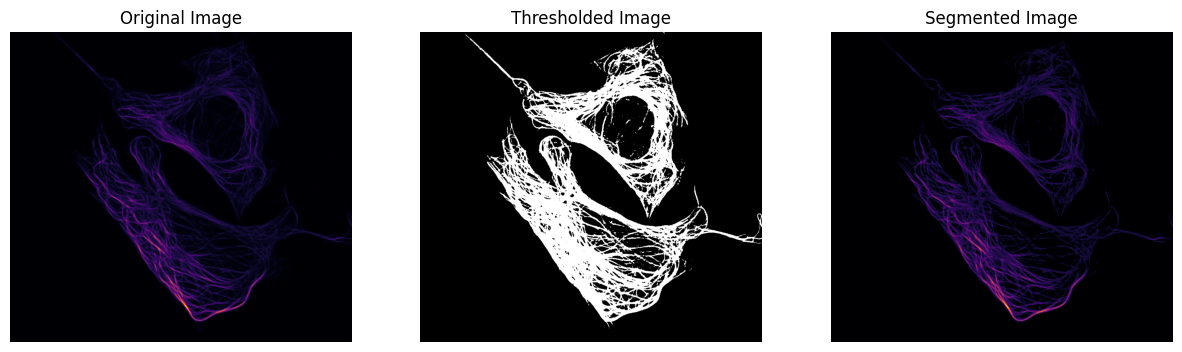

In [18]:
#@markdown ###Path to the image:
Image_path = "/content/microtubules-u2os.tif" #@param {type:"string"}
# Check that the base_path is on the path and otherwise add it
Image_path = check_base_path(base_path, Image_path)

#@markdown ###Threshold:
Threshold_percentage = 0.05 #@param {type:"slider", min:0.0, max:1.0, step:0.01}

#@markdown ###Values lower than the threshold:
Lower_values = True # @param {type:"boolean"}

#@markdown ###Saving path:
#@markdown Folder to store the mask and segmented images.
Saving_path = "/content/microtubules-u2os_bin.tif" #@param {type:"string"}
# Check that the base_path is on the path and otherwise add it
Saving_path = check_base_path(base_path, Saving_path)

# Create the folder if it does nto exist
os.makedirs(Saving_path, exist_ok=True)

#####

# Read the input image if it is not the same as the previous one
if Image_path != old_image_path:
    old_image_path = Image_path
    im = imageio.imread(Image_path)

# Normalize the image
norm_im = normalize(im)

# Threshold the image
thresholded_img = threshold(norm_im, threshold=Threshold_percentage, lower_values=Lower_values)

# Segmented image
segmented_img = filter(img=im, mask=thresholded_img)

# Save the results
imageio.imwrite(os.path.join(Saving_path, 'mask.tif'), thresholded_img)
imageio.imwrite(os.path.join(Saving_path, 'segmented.tif'), segmented_img)
print("Images correctly saved!\n")

#####

# Plot the images
fig, ax = plt.subplots(1,3,figsize=(15, 10))

ax[0].imshow(im, 'inferno')
ax[0].set_axis_off()
ax[0].set_title('Original Image')

ax[1].imshow(thresholded_img,'gray')
ax[1].set_axis_off()
ax[1].set_title('Thresholded Image')

ax[2].imshow(segmented_img, 'inferno')
ax[2].set_axis_off()
ax[2].set_title('Segmented Image')

plt.show();